<a href="https://colab.research.google.com/github/chaeyeongSon/pdm09/blob/master/py-tensorflow/tf2_8_cifar10_CNN_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of cifar-10 dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***
- ## Traget: Find the best model
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

### CIFAR-10 Dataset (CIFAR: Canadian Institute For Advanced Research)
> https://www.cs.toronto.edu/~kriz/cifar.html

- (50000, 32, 32, 3), train
- (10000, 32, 32, 3), test
- color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc
> class names
> - ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

- 참고 문헌  

> https://becominghuman.ai/cifar-10-image-classification-fd2ace47c5e8  

> https://becominghuman.ai/convolutional-neural-networks-cnns-convnets-for-visual-recognition-cae879a70f1a

> https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

## Search the best model of C2F2
- callback
    - Early stopping
    - model checkpoint

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)

print(tf.__version__)

2.3.0


In [2]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [3]:
from keras.datasets import cifar10

(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

# Reshape
# X_train = X_train0.reshape(60000,28,28,1)
# X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train0/255.0, X_test0/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

170500096/170498071 [==============================] - 2s 0us/step
X_train=(50000, 32, 32, 3)
y_train=(50000, 1)
X_test=(10000, 32, 32, 3)
y_test=(10000, 1)


In [4]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((50000, 10), (10000, 10))

In [5]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((50000, 1), (50000, 10))

### Display images in CIFAR-10
- one random image
- 10 representative images

48549


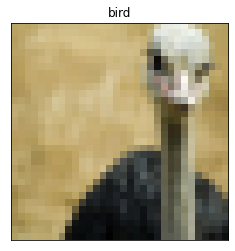

In [6]:
# Code here!
# display one random image from the training set:
class_names =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx][0]])
plt.xticks([])
plt.yticks([])
plt.show()

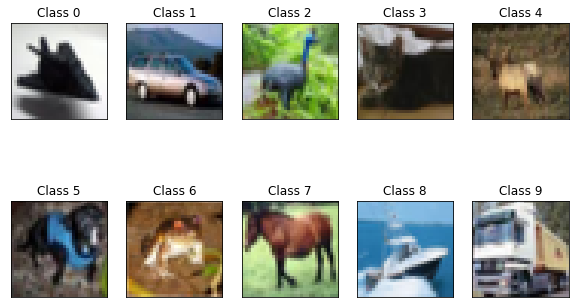

In [7]:
fig = plt.figure(figsize=(10,6))
num0_9 = np.unique(y_train0, return_index=True)[1]
images = X_train[num0_9]
for i in range(10):
    plt.subplot(2, 5, i+1)
    # num0_9 = X_train0[y_train0 == i]
    
    # print(num0_9.shape)
    # plt.imshow(num0_9[0]) 
    plt.imshow(images[i])
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping

## **CNN2 + FCN2**

In [9]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [10]:
c2f2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               524416    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [11]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [13]:
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1450 - accuracy: 0.5930 - val_loss: 1.0591 - val_accuracy: 0.6198
Epoch 2/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0330 - accuracy: 0.6358 - val_loss: 0.9314 - val_accuracy: 0.6735
Epoch 3/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9481 - accuracy: 0.6634 - val_loss: 0.9382 - val_accuracy: 0.6676
Epoch 4/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8793 - accuracy: 0.6871 - val_loss: 0.9061 - val_accuracy: 0.6834
Epoch 5/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8252 - accuracy: 0.7093 - val_loss: 0.8709 - val_accuracy: 0.7006
Epoch 6/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7714 - accuracy: 0.7252 - val_loss: 0.8712 - val_accuracy: 0.6974
Epoch 7/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7240 - accuracy: 0.7410 - val_loss: 0.9360 - val_ac

In [14]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 1.5863 - accuracy: 0.7008


[1.5863256454467773, 0.7008000016212463]

## **CNN2 + FCN3**

In [15]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [16]:
c2f3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               524416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [17]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c2f3_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [18]:
c2f3.fit(X_train, y_train, epochs=500, batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5680 - accuracy: 0.4309 - val_loss: 1.2032 - val_accuracy: 0.5761
Epoch 2/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2135 - accuracy: 0.5739 - val_loss: 1.0841 - val_accuracy: 0.6174
Epoch 3/500
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0671 - accuracy: 0.6275 - val_loss: 0.9943 - val_accuracy: 0.6555
Epoch 4/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9767 - accuracy: 0.6602 - val_loss: 0.9370 - val_accuracy: 0.6775
Epoch 5/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8989 - accuracy: 0.6874 - val_loss: 0.9123 - val_accuracy: 0.6891
Epoch 6/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8384 - accuracy: 0.7079 - val_loss: 0.8794 - val_accuracy: 0.6936
Epoch 7/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7932 - accuracy: 0.7228 - val_loss: 0.9402 - val_ac

In [19]:
 c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 1.4375 - accuracy: 0.6991


[1.4374666213989258, 0.6991000175476074]

# **[DIY] Hidden layer에 따른 정확도**

In [20]:
score1=c2f2.evaluate(X_test, y_test, batch_size = 32)
score2=c2f3.evaluate(X_test, y_test, batch_size = 32)
losses = [score1[0],score2[0]]
accuracies= [score1[1],score2[1]]
losses,accuracies

313/313 [==============================] - 1s 3ms/step - loss: 1.4375 - accuracy: 0.6991


([1.5863256454467773, 1.4374666213989258],
 [0.7008000016212463, 0.6991000175476074])

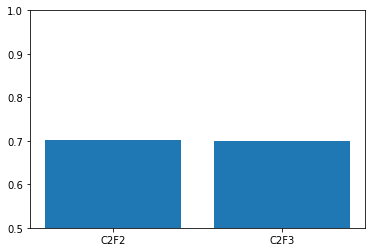

In [21]:
x = np.arange(2)
cnns = ['C2F2','C2F3']

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((.5,1.0))
plt.show()

## Complex model
- C4F5 model

![cnn_c4f5.png](https://raw.githubusercontent.com/Redwoods/Py/master//pdm2020/my-note/py-tensorflow/images/cnn_c4f5.png)

In [22]:
c4f5 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 256,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 512,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c4f5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [23]:
c4f5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 512)        

In [24]:
cp_callback = callbacks.ModelCheckpoint(filepath="./cifar10_c4f5_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=25)    # patience=10, 25, 50

In [25]:
c4f5.fit(X_train, y_train, epochs=500, batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6297 - accuracy: 0.3811 - val_loss: 1.2697 - val_accuracy: 0.5362
Epoch 2/500
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1981 - accuracy: 0.5771 - val_loss: 1.0018 - val_accuracy: 0.6545
Epoch 3/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9984 - accuracy: 0.6582 - val_loss: 0.9876 - val_accuracy: 0.6656
Epoch 4/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8706 - accuracy: 0.7080 - val_loss: 0.8992 - val_accuracy: 0.6949
Epoch 5/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7884 - accuracy: 0.7384 - val_loss: 0.8401 - val_accuracy: 0.7200
Epoch 6/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7130 - accuracy: 0.7637 - val_loss: 0.8185 - val_accuracy: 0.7282
Epoch 7/500
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6497 - accuracy: 0.7839 - val_loss: 0.8077 -

In [26]:
 c4f5.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 4ms/step - loss: 1.1264 - accuracy: 0.7482


[1.1264487504959106, 0.748199999332428]

## Graph of loss and accuracy
- model: C4f5

In [27]:
c4f5 = keras.models.Sequential([ 
    Conv2D(input_shape=(32,32,3),kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 128,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 256,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 512,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(512, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(1024, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c4f5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
epoch = 38
hist = c4f5.fit(X_train, y_train, 
         epochs = epoch, 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/38
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6938 - accuracy: 0.3535 - val_loss: 1.3648 - val_accuracy: 0.5026
Epoch 2/38
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2819 - accuracy: 0.5429 - val_loss: 1.0802 - val_accuracy: 0.6234
Epoch 3/38
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0765 - accuracy: 0.6293 - val_loss: 1.0647 - val_accuracy: 0.6355
Epoch 4/38
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9452 - accuracy: 0.6803 - val_loss: 0.9433 - val_accuracy: 0.6762
Epoch 5/38
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8407 - accuracy: 0.7190 - val_loss: 0.9152 - val_accuracy: 0.6971
Epoch 6/38
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7588 - accuracy: 0.7473 - val_loss: 0.8861 - val_accuracy: 0.7073
Epoch 7/38
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7068 - accuracy: 0.7664 - val_loss: 0.8330 - val_ac

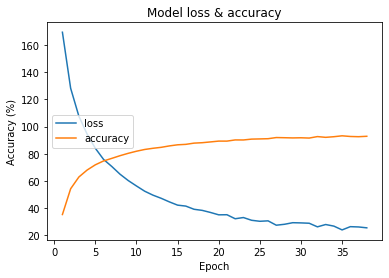

In [29]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = epoch
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [30]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

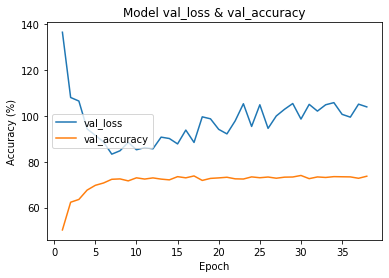

In [31]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

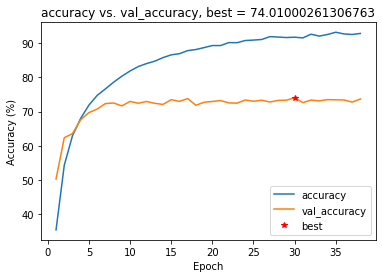

In [32]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.plot(np.argmax(np.array(vacc_list))+1,vacc_list[np.argmax(np.array(vacc_list))], 'r*') 
plt.title('accuracy vs. val_accuracy, best = ' +str(vacc_list[np.argmax(np.array(vacc_list))]))
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy','best']) #, loc='center bottom')


## cifar10 모델 학습
> https://gruuuuu.github.io/machine-learning/cifar10-cnn/#

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [ ]:
# c2f2.save('fmnist_cnn_best.hdf5')

In [33]:
from keras.models import load_model

model = load_model('cifar10_c4f5_best_weights.013-0.7504.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 4ms/step - loss: 0.8530 - accuracy: 0.7504


[0.8530256152153015, 0.7504000067710876]

## Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [35]:
predictions = model.predict(X_test)

In [36]:
predictions.shape

(10000, 10)

In [37]:
predictions0 = np.argmax(predictions, axis=1)
predictions0.shape

(10000,)

In [38]:
cm = confusion_matrix(y_test0, predictions0)

In [39]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

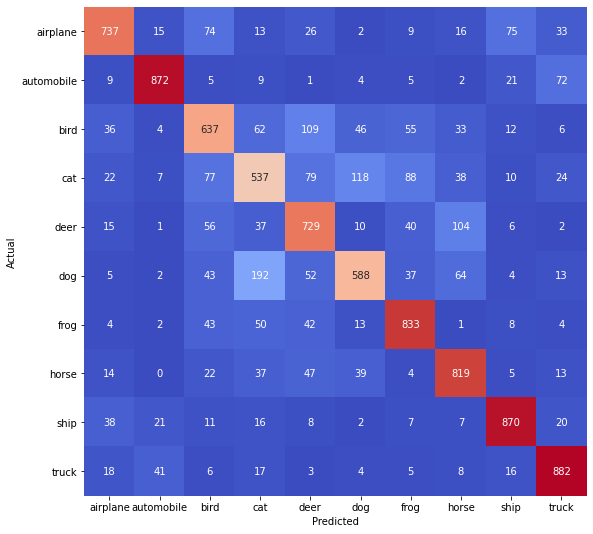

In [40]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.coolwarm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# State of current scores of cifar-10

> https://paperswithcode.com/sota/image-classification-on-cifar-10

## Transfer learning on cifar-10

- https://medium.com/@andrew.dabydeen/transfer-learning-using-resnet50-and-cifar-10-6242ed4b4245

- https://medium.com/swlh/comparative-analysis-of-cifar-10-image-classification-transfer-learning-vs-user-defined-cnns-e673685d925e

- https://medium.com/swlh/hands-on-the-cifar-10-dataset-with-transfer-learning-2e768fd6c318

- https://medium.com/analytics-vidhya/the-transfer-learning-experience-with-vgg16-and-cifar-10-dataset-9b25b306a23f